In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

# Подготовка

In [5]:
data = pd.read_csv('/Users/nikita/Downloads/dirty_data.csv')

In [7]:
data

,Unnamed: 0,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,0,West,Sandy,Cotton,0.000000,27.676966,False,True,Cloudy,122,6.555816
1,1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,3,North,Sandy,Soybean,0.000000,16.644190,False,True,Rainy,146,6.517573
4,4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


Удаляем ненужные столбцы

In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
data = data[['Rainfall_mm', 'Fertilizer_Used', 'Irrigation_Used', 'Yield_tons_per_hectare']]

Нормализация

In [13]:
scaler = StandardScaler() #x_new = (x - x_mean) / disp

scaled_data = scaler.fit_transform(data)

data_pre, data_test = data[:900000], data[900000:]

data_train = data_pre[:630000]
data_val = data_pre[630000:900000]

data_pre_scaled, data_test_scaled = scaled_data[:900000], scaled_data[900000:]
data_train_scaled = scaled_data[:630000]
data_val_scaled = scaled_data[630000:900000]

In [15]:
data

,Rainfall_mm,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,0.000000,False,True,6.555816
1,992.673282,True,True,8.527341
2,147.998025,False,False,1.127443
3,0.000000,False,True,6.517573
4,730.379174,True,True,7.248251
...,...,...,...,...
999995,302.805345,False,False,1.347586
999996,932.991383,True,False,7.311594
999997,867.362046,True,False,5.763182
999998,492.812857,False,False,2.070159


In [9]:
# Замена нулей на медиану (включить если нужно)
# for i in data.columns:
#     data[i] = data[i].replace(0, data[i].median())


In [17]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rainfall_mm,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
Rainfall_mm,1.000000,-0.001018,-0.000687,0.760788
Fertilizer_Used,-0.001018,1.000000,0.001510,0.442099
Irrigation_Used,-0.000687,0.001510,1.000000,0.353741
Yield_tons_per_hectare,0.760788,0.442099,0.353741,1.000000


# Кластеризация

## K-neighbours
Разделение на n кластеров с минимизацией внутрикластерной дисперсии

In [17]:
data

,Rainfall_mm,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,0.000000,False,True,6.555816
1,992.673282,True,True,8.527341
2,147.998025,False,False,1.127443
3,0.000000,False,True,6.517573
4,730.379174,True,True,7.248251
...,...,...,...,...
999995,302.805345,False,False,1.347586
999996,932.991383,True,False,7.311594
999997,867.362046,True,False,5.763182
999998,492.812857,False,False,2.070159


Ищем k по методу локтя

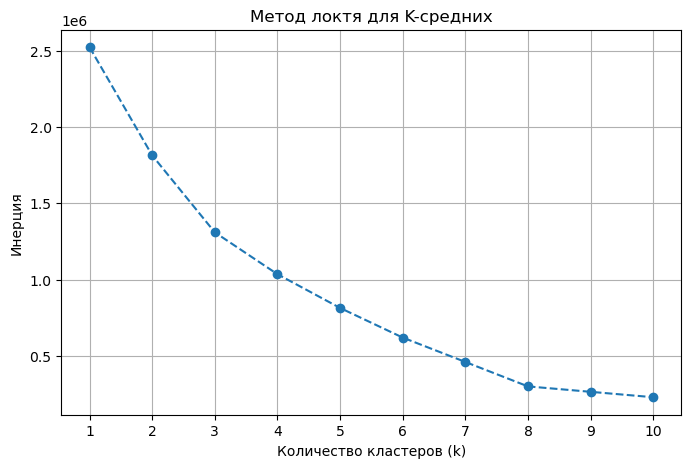

In [21]:
inertia = [] #ср кв раст от т до бл кл
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(data_train_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Метод локтя для K-средних')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.xticks(k_values)
plt.grid()
plt.show()

In [25]:
kmeans = KMeans(n_clusters=8, n_init='auto', random_state=42)

In [29]:
scaled_data.shape

(1000000, 4)

In [31]:
kmeans.fit(data_train_scaled)

KMeans(random_state=42)

In [16]:
kmeans.cluster_centers_

array([[ 0.85309392, -0.99988001,  1.00101852,  0.58946597],
       [ 0.86307709, -0.99988001, -0.99898252, -0.10830126],
       [-0.86256417,  1.00012001,  1.00101852,  0.11490832],
       [ 0.8576617 ,  1.00012001,  1.00101852,  1.47889469],
       [-0.86056056, -0.99988001, -0.99898252, -1.47747012],
       [ 0.86122018,  1.00012001, -0.99898252,  0.77324186],
       [-0.86071781, -0.99988001,  1.00101852, -0.77009973],
       [-0.86201855,  1.00012001, -0.99898252, -0.59388653]])

Визуализация разбиения

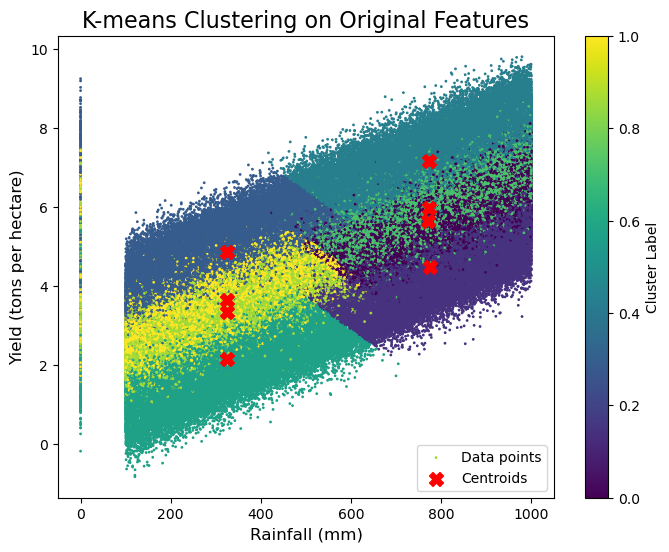

In [17]:
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))

plt.scatter(data_train['Rainfall_mm'], data_train['Yield_tons_per_hectare'], c=kmeans.labels_, cmap='viridis', s=1, label="Data points")

plt.scatter(centroids_original[:, 0], centroids_original[:, 3], 
            c='red', s=100, marker='X', label="Centroids")

plt.title("K-means Clustering on Original Features", fontsize=16)
plt.xlabel("Rainfall (mm)", fontsize=12)
plt.ylabel("Yield (tons per hectare)", fontsize=12)
plt.legend()
plt.colorbar(label="Cluster Label")
plt.show()

Метрики Davies Bouldin Index + Silhouette 

Для каждого кластера рассчитывается среднее расстояние от точек кластера до его центра

Для каждого объекта вычисляется среднее расстояние внутри своего кластера.
среднее расстояние до ближайшего другого кластера.
рассчитывается для каждого объекта.
Межкластерное расстояние - Внутрикластерное расстояние / max(из этого)

In [33]:
val_k = kmeans.fit(data_val_scaled)

In [35]:
dbi = davies_bouldin_score(data_val_scaled, val_k.labels_) 

In [37]:
dbi #0.58

0.5800644673701997

In [33]:
S = silhouette_score(data_val_scaled[:10000], val_k.labels_[:10000])

In [34]:
S #0.55

0.5516655729802844

## Иерархическая кластеризация
создает дерево кластеров (дендрограмму), где объекты с похожими характеристиками объединяются в кластеры на каждом уровне

In [41]:
hier = AgglomerativeClustering(n_clusters=8)

In [43]:
hier.fit(data_train_scaled[:10000])

AgglomerativeClustering(n_clusters=8)

При помощи scipy строим "дерево" связей на примере из 50 sample-ов

In [53]:
linkage_data = linkage(data_train[:50], method='ward', metric='euclidean')

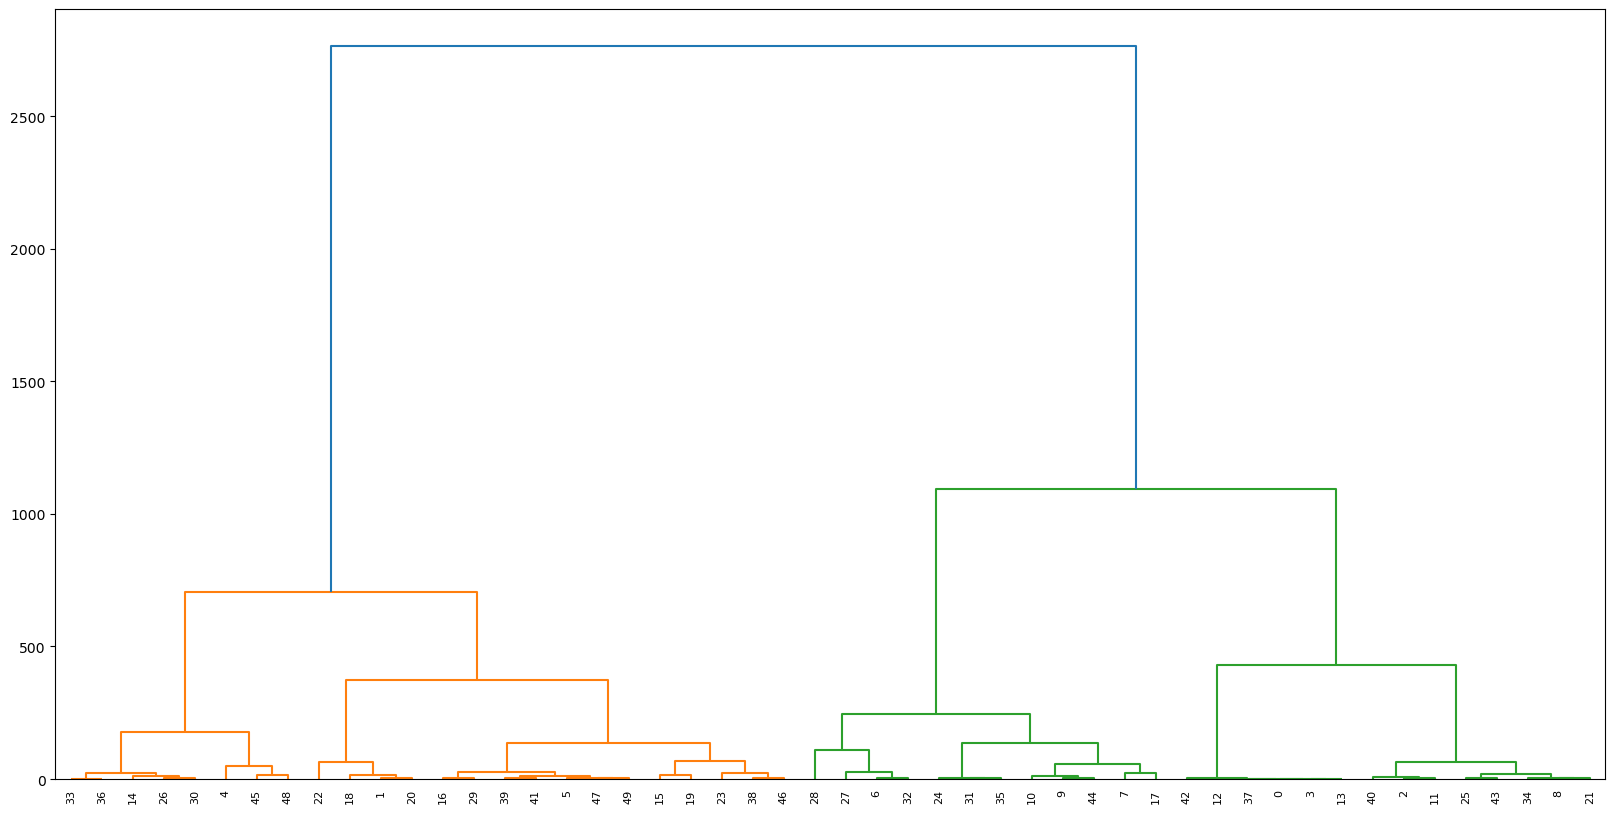

In [55]:
plt.figure(figsize=(20, 10))
dendrogram(linkage_data)
plt.show()

Считаем метрики на небольшом объёме данных в 10000 samples для ускорения вычислений

In [37]:
val_h = hier.fit(data_val_scaled[:10000])

In [38]:
dbi_hier = davies_bouldin_score(data_val_scaled[:10000], val_h.labels_)

In [42]:
dbi_hier #0.616

0.6162585696717562

In [40]:
s_hier = silhouette_score(data_val_scaled[:10000], val_h.labels_)

In [43]:
s_hier #0.522

0.5221915293540766

## DBSCAN
использует плотность точек в пространстве для формирования кластеров. В отличие от K-means, DBSCAN не требует заранее заданного числа кластеров и может идентифицировать выбросы (шум).

In [44]:
db = DBSCAN(eps=0.44)

In [45]:
db.fit(data_train_scaled[:10000])

DBSCAN(eps=0.44)

In [46]:
labels = db.labels_

In [47]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 1


In [48]:
y_db = db.labels_

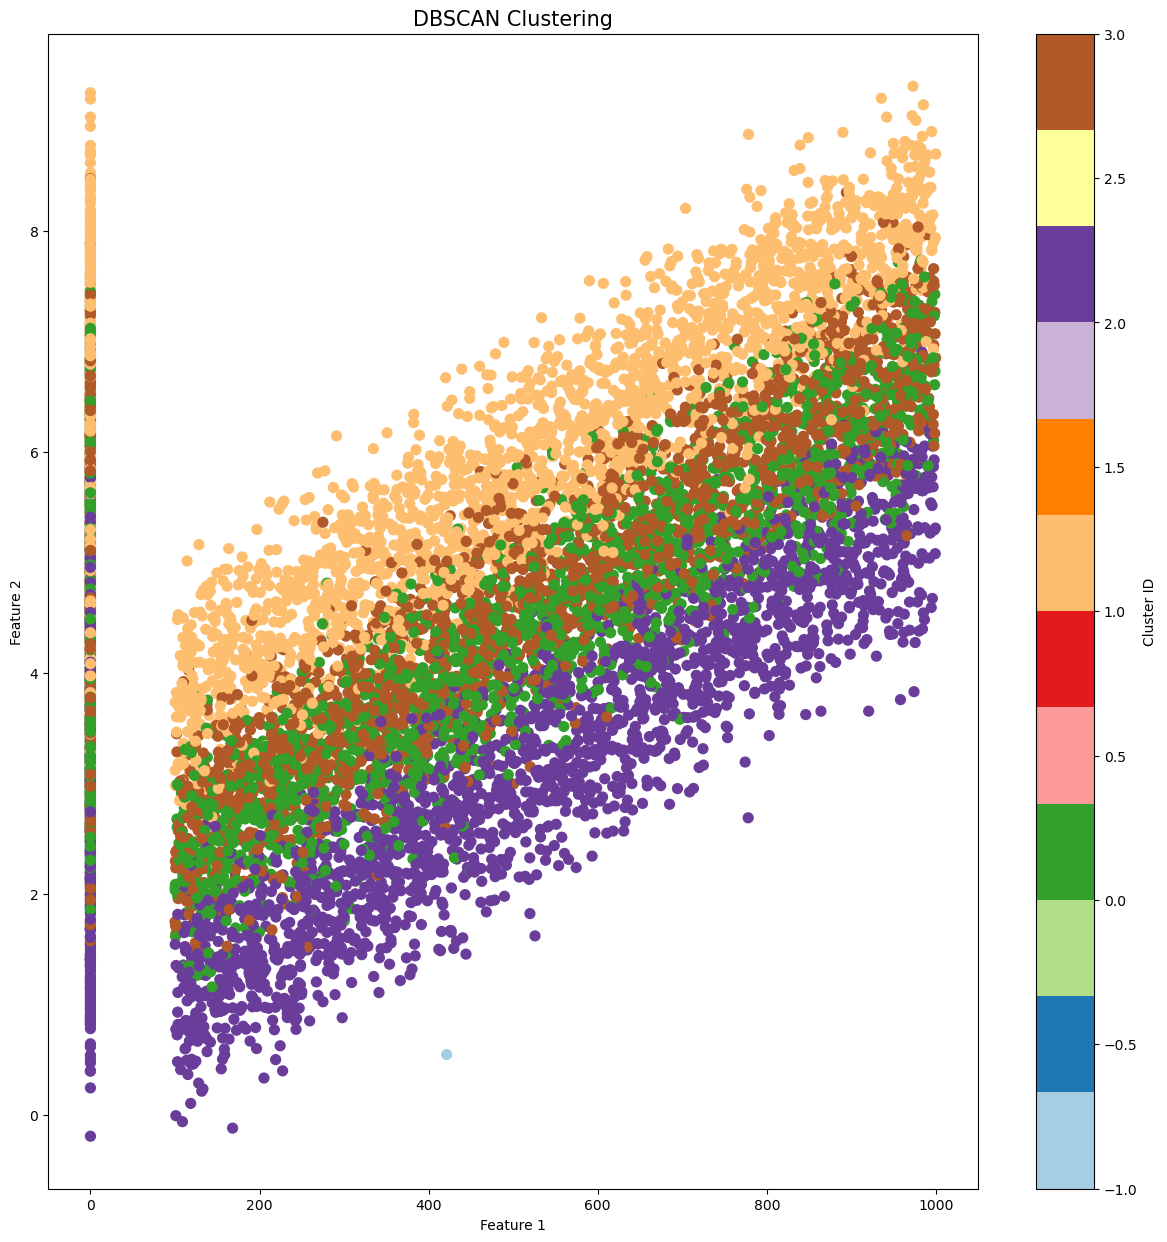

In [49]:
plt.figure(figsize=(15, 15))
plt.scatter(data_train['Rainfall_mm'][:10000], data_train['Yield_tons_per_hectare'][:10000], c=y_db, cmap='Paired', s=50)
plt.title('DBSCAN Clustering', fontsize=15)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster ID')
plt.show()

In [50]:
val_db = db.fit(data_val_scaled[:10000])

In [51]:
dbi_db = davies_bouldin_score(data_val_scaled[:10000], val_db.labels_)

In [52]:
dbi_db #1.07

1.0731822835706717

In [54]:
s_db = silhouette_score(data_val_scaled[:10000], val_db.labels_)

In [55]:
s_db #0.423

0.42353137847071975